# Pivot tabulky

__[Animace operací s dataframy](https://github.com/nathancarter/dataframe-animations?tab=readme-ov-file)__

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [165]:
# Z minule lekce
url_food_sample_100 = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/nacteni-dat/nacteni-dat/food_sample_100.csv"
url_food_other = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/pokrocile-upravy/food_other.csv"
url_food_nutrient = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/podmineny-vyber/podmineny-vyber/food_nutrient.csv"
url_branded_food = "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/spojovani/excs/znacky/branded_food.csv"

food_sample_100 = pd.read_csv(url_food_sample_100)
food_other = pd.read_csv(url_food_other)
food_nutrient = pd.read_csv(url_food_nutrient)
branded_food = pd.read_csv(url_branded_food)

food = pd.concat([food_sample_100, food_other])
food_brands = pd.merge(food, branded_food, on="fdc_id")

# Definuje seznam klíčových živin, které chceme sledovat
top_nutrient_list = [
    "Protein",
    "Sodium, Na",
    "Total lipid (fat)",
    "Carbohydrate, by difference",
    "Sugars, total including NLEA",
    "Fatty acids, total saturated",
    "Cholesterol",
    "Fiber, total dietary",
    "Calcium, Ca",
    "Iron, Fe",
]

# Definuje seznam oblíbených kategorií potravin
top_cat_list = [
    "Candy",
    "Popcorn, Peanuts, Seeds & Related Snacks",
    "Cheese",
    "Ice Cream & Frozen Yogurt",
    "Chips, Pretzels & Snacks",
    "Cookies & Biscuits",
    "Pickles, Olives, Peppers & Relishes",
    "Breads & Buns",
    "Fruit & Vegetable Juice, Nectars & Fruit Drinks",
    "Snack, Energy & Granola Bars",
    "Chocolate",
    "Other Snacks",
]
food_merged = pd.merge(food, food_nutrient, on="fdc_id")
food_merged = pd.merge(food_merged, branded_food, on="fdc_id")
food_merged = food_merged[food_merged["name"].isin(top_nutrient_list)]
food_merged = food_merged[food_merged["branded_food_category"].isin(
    top_cat_list)]

Při přeskupování dat v tabulce se kombinace sloupců `index` a `columns` nesmí opakovat. 

Duplikáty lze odstranit metodou `drop_duplicates()` s parametrem `subset` pro specifikaci sloupců.

In [166]:
food_nutrient = food_nutrient.drop_duplicates(subset=["fdc_id", "name"])
food_nutrient.head()

,fdc_id,nutrient_id,amount,data_points,derivation_id,min,max,median,loq,footnote,min_year_acquired,name,unit_name
0,1106032,1257,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,"Fatty acids, total trans",G
1,1107191,1257,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Fatty acids, total trans",G
2,1107295,1257,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Fatty acids, total trans",G
3,1107475,1257,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Fatty acids, total trans",G
4,1107528,1257,0.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Fatty acids, total trans",G


In [167]:
# Vytváří pivot tabulku z 'food_nutrient'. 'fdc_id' je použit jako index, názvy sloupců jsou z 'name' a hodnoty jsou z 'amount'
food_nutrient_pivot = pd.pivot(
    food_nutrient, 
    index="fdc_id", 
    columns="name", 
    values="amount"
)

food_nutrient_pivot.head()

name,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,Beta-sitosterol,...,Vitamin K (phylloquinone),Water,Xylitol,Zeaxanthin,"Zinc, Zn",cis-Lutein/Zeaxanthin,cis-Lycopene,cis-beta-Carotene,trans-Lycopene,trans-beta-Carotene
fdc_id,,,,,,,,,,,,,,,,,,,,,
167551,NaN,NaN,0.392,0.0,0.489,1.80,0.572,NaN,NaN,NaN,...,3.9,3.30,NaN,NaN,1.24,NaN,NaN,NaN,NaN,NaN
167711,NaN,NaN,NaN,0.0,NaN,0.58,NaN,NaN,NaN,NaN,...,0.1,87.63,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN
168370,NaN,NaN,1.782,0.0,2.004,1.14,2.910,NaN,NaN,NaN,...,0.0,66.99,NaN,NaN,2.86,NaN,NaN,NaN,NaN,NaN
168460,NaN,NaN,0.355,0.0,0.585,1.10,1.148,NaN,NaN,NaN,...,70.6,79.45,NaN,NaN,1.04,NaN,NaN,NaN,NaN,NaN
168526,NaN,NaN,NaN,NaN,0.222,1.24,NaN,NaN,NaN,NaN,...,NaN,75.48,NaN,NaN,1.03,NaN,NaN,NaN,NaN,NaN


K tabulce `food_nutrient_pivot` můžeme připojit další informace o potravinách, se kterými jsme pracovali v předchozích lekcích. 

Budeme tedy vědět, kterých potravin se každý řádek týká.

In [168]:
# Sloučí 'food_nutrient_pivot' s 'food_brands' podle společného klíče 'fdc_id', aby se spojily informace o živinách s informacemi o značkách potravin
food_nutrient_pivot = pd.merge(food_nutrient_pivot, 
                               food_brands, 
                               on="fdc_id")

# Filtruje 'food_nutrient_pivot' podle 'branded_food_category', aby zahrnoval pouze záznamy z 'top_cat_list'
food_nutrient_pivot = food_nutrient_pivot[
    food_nutrient_pivot["branded_food_category"].isin(top_cat_list)
]

food_nutrient_pivot.head()

,fdc_id,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,...,branded_food_category,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description
73,356750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cheese,LI,NaN,2018-04-30,2019-04-01,United States,NaN,NaN,NaN,NaN
74,357139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ice Cream & Frozen Yogurt,LI,NaN,2018-09-04,2019-04-01,United States,NaN,NaN,NaN,NaN
76,357197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cookies & Biscuits,LI,NaN,2017-11-04,2019-04-01,United States,NaN,NaN,NaN,NaN
80,357489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cheese,LI,NaN,2018-05-24,2019-04-01,United States,NaN,NaN,NaN,NaN
84,357894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Cookies & Biscuits,LI,NaN,2018-05-26,2019-04-01,United States,NaN,NaN,NaN,NaN


<Axes: xlabel='Fatty acids, total saturated', ylabel='Cholesterol'>

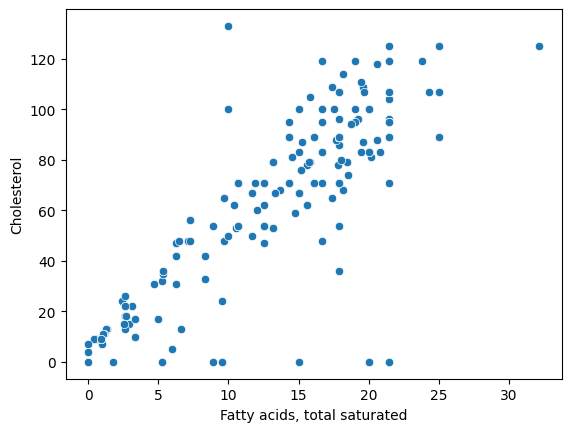

In [169]:
# Filtruje 'food_nutrient_pivot' pro položky, které spadají do kategorie 'Cheese'
cheese = food_nutrient_pivot[food_nutrient_pivot["branded_food_category"] == "Cheese"]

sns.scatterplot(data=cheese, x="Fatty acids, total saturated", y="Cholesterol")

### Skupiny

Na zakládě nějaké číselné hodnoty můžeme data rozdělit i do skupin. Každá skupina potřebuje dvě věci:

- číselný interval, který udává rozsah pro zařazení do skupiny,
- označení skupiny.

Uvažujme následující skupiny.

| Obsah cholesterolu     | Kategorie           |
|------------------------|---------------------|
| 0-20                   | Low Cholesterol     |
| 20-100                 | Moderate Cholesterol|
| 100-inf                | High Cholesterol    |

Každé potravině můžeme přiřadit popisek, která nám usnadní psaní dotazů.

In [170]:
# Definuje rozsahy (bins) pro kategorizaci úrovní cholesterolu a přiřazuje jim popisky
bins = [0, 20, 100, float("inf")]
labels = ["Low Cholesterol", "Moderate Cholesterol", "High Cholesterol"]

# Vytváří nový sloupec 'Cholesterol Category' v 'food_nutrient_pivot', kde hodnoty cholesterolu jsou kategorizovány
# podle předem definovaných rozsahů a přiřazených popisků
food_nutrient_pivot["Cholesterol Category"] = pd.cut(
    food_nutrient_pivot["Cholesterol"], 
    bins=bins, 
    labels=labels
)

<Axes: xlabel='count', ylabel='branded_food_category'>

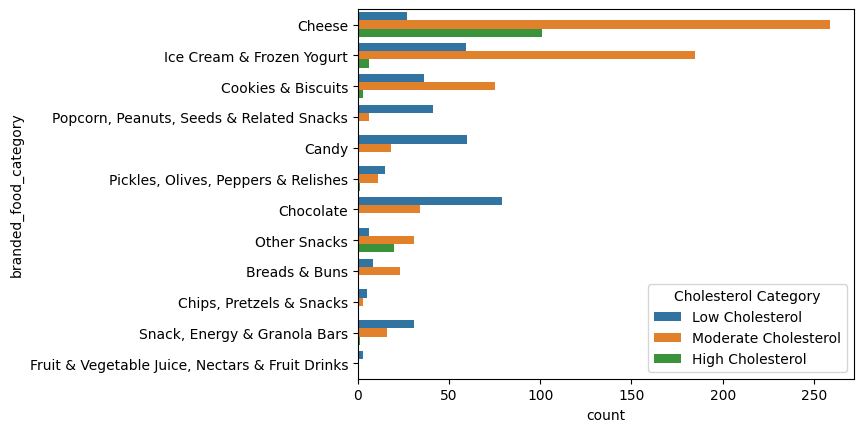

In [171]:
# Používá seaborn knihovnu k vizualizaci počtu položek v každé kategorii potravin
# rozdělených podle kategorií cholesterolu
sns.countplot(
    data=food_nutrient_pivot, 
    y="branded_food_category", 
    hue="Cholesterol Category"
)

---
## Cvičení

### Dvě kritéria

*Poznámka:* Zadání tohoto příkladu ti možná bude připadat povědomé, bylo již v lekci o podmíněném výběru. Pokud jsi ale příklad neřešil(a), nevadí. Pokud ano, uvidíš, že řešení bude díky funkci `pivot()` mnohem jednodušší.

Připravujeme seznam potravin pro účely lékařského výzkumu, který se bude zabývat kardiovaskulárním systémem. Chceme vybrat pottraviny, které splňují dvě kritéria:

- nízký obsah nasycených mastných kyselin (`"Fatty acids, total saturated"`, uvažuj méně než 1 gram),
- vysoký obsah vlákniny (`"Fiber, total dietary"`, uvažuj více než 5 gramů).

Zatímco nasycené mastné kyseliny jsou považovány za spíše škodlivé pro kardiovaskulární systém, vláknina je považována spíše za prospěšnou. Vyber z tabulky `food_nutrient_pivot` potraviny, které vyhovují oběma podmínkám.

In [172]:
# Vytvoří podmínku pro filtrování potravin s méně než 1g nasycených mastných kyselin
fat_condition = food_nutrient_pivot["Fatty acids, total saturated"] < 1

# Vytvoří podmínku pro filtrování potravin s více než 5g vlákniny
fiber_condition = food_nutrient_pivot["Fiber, total dietary"] > 5

# Aplikuje obě podmínky na datový rámec a vytváří výběr potravin, které splňují obě kritéria
selection = food_nutrient_pivot[fat_condition & fiber_condition]

# Zobrazí prvních pět řádků vyfiltrovaného výběru
selection.head()

,fdc_id,"Ergosta-5,7-dienol",25-hydroxycholecalciferol,Alanine,"Alcohol, ethyl",Arginine,Ash,Aspartic acid,Beta-glucan,Beta-sitostanol,...,data_source,package_weight,modified_date,available_date,market_country,discontinued_date,preparation_state_code,trade_channel,short_description,Cholesterol Category
199,381237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-08-15,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN
260,393002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-03-10,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN
453,431308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-06-21,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN
479,438839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-06-02,2019-04-01,United States,NaN,NaN,NaN,NaN,Moderate Cholesterol
488,440221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LI,NaN,2018-02-17,2019-04-01,United States,NaN,NaN,NaN,NaN,NaN


## Další funkce pro tvorbu pivot tabulek

Pivot tabulky velmi často provádíme v kombinaci s nějakou agregací. Uvažujme například, že by nás zajímal průměrný obsah výživných látek za jednotlivé kategorie, nikoli za konkrétní potraviny. 

In [173]:
# Vytváří pivot tabulku z 'food_merged'
# 'amount' je hodnota, která se agreguje
# 'branded_food_category' je index (řádky tabulky)
# 'name' je sloupec, který definuje, jaké živiny se mají zobrazit v jednotlivých sloupcích
# np.mean je funkce, která se použije pro agregaci dat - vypočítá průměr množství živin pro každou kategorii
pivot_table = pd.pivot_table(food_merged, values="amount",
                             index="branded_food_category", columns="name", aggfunc=np.mean)

pivot_table

/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/417953197.py:6: FutureWarning: The provided callable <function mean at 0x10a8c7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(food_merged, values="amount",


name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Breads & Buns,86.738397,49.977869,5.305085,0.774226,3.735246,2.547083,9.323796,508.426829,5.799218,5.190041
Candy,45.145455,76.501801,5.498305,5.549302,1.382993,0.699011,2.899155,98.062802,58.791884,8.075506
Cheese,570.703046,4.994888,76.840000,15.422928,0.170419,2.387632,19.969457,723.591584,1.808579,25.227139
"Chips, Pretzels & Snacks",58.746544,58.940776,0.948598,3.899954,5.423182,1.961475,8.944318,640.990826,4.024818,24.957227
Chocolate,99.737705,55.725380,11.785714,18.123514,4.787097,3.485838,6.695968,122.437838,43.997622,30.863459
Cookies & Biscuits,32.720930,65.664907,18.731061,9.548030,2.280075,1.876908,5.621513,953.877778,33.460443,20.119631
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",23.764151,11.636411,0.252874,0.034023,0.652083,0.378316,0.402897,35.995192,10.544615,0.034350
Ice Cream & Frozen Yogurt,240.506849,27.784020,49.158784,5.694626,1.182927,0.501232,3.393443,147.065359,20.806645,9.278059
Other Snacks,83.308333,42.795468,34.854015,6.682878,3.278571,2.245000,19.242766,981.157143,12.601353,23.715143


In [174]:
# Vytvoří křížovou tabulku (crosstab) z 'food_merged'
# 'branded_food_category' jsou řádky tabulky
# 'name' jsou sloupce tabulky
# 'amount' jsou hodnoty, které se agregují
# np.mean je funkce pro výpočet průměru, která se použije jako agregátní funkce
crosstab_table = pd.crosstab(
    food_merged["branded_food_category"],
    food_merged["name"],
    values=food_merged["amount"],
    aggfunc=np.mean
)

crosstab_table

/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/3760227128.py:6: FutureWarning: The provided callable <function mean at 0x10a8c7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  crosstab_table = pd.crosstab(


name,"Calcium, Ca","Carbohydrate, by difference",Cholesterol,"Fatty acids, total saturated","Fiber, total dietary","Iron, Fe",Protein,"Sodium, Na","Sugars, total including NLEA",Total lipid (fat)
branded_food_category,,,,,,,,,,
Breads & Buns,86.738397,49.977869,5.305085,0.774226,3.735246,2.547083,9.323796,508.426829,5.799218,5.190041
Candy,45.145455,76.501801,5.498305,5.549302,1.382993,0.699011,2.899155,98.062802,58.791884,8.075506
Cheese,570.703046,4.994888,76.840000,15.422928,0.170419,2.387632,19.969457,723.591584,1.808579,25.227139
"Chips, Pretzels & Snacks",58.746544,58.940776,0.948598,3.899954,5.423182,1.961475,8.944318,640.990826,4.024818,24.957227
Chocolate,99.737705,55.725380,11.785714,18.123514,4.787097,3.485838,6.695968,122.437838,43.997622,30.863459
Cookies & Biscuits,32.720930,65.664907,18.731061,9.548030,2.280075,1.876908,5.621513,953.877778,33.460443,20.119631
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",23.764151,11.636411,0.252874,0.034023,0.652083,0.378316,0.402897,35.995192,10.544615,0.034350
Ice Cream & Frozen Yogurt,240.506849,27.784020,49.158784,5.694626,1.182927,0.501232,3.393443,147.065359,20.806645,9.278059
Other Snacks,83.308333,42.795468,34.854015,6.682878,3.278571,2.245000,19.242766,981.157143,12.601353,23.715143


In [175]:
# Vytváří křížovou tabulku (crosstab) z datového rámce 'food_nutrient_pivot'
# Sloupce tabulky reprezentují kategorie cholesterolu, řádky jsou kategorie značkových potravin
# Hodnoty v tabulce udávají počty potravin v jednotlivých kombinacích kategorií
food_pivot_cholesterol_pivot = pd.crosstab(
    food_nutrient_pivot["branded_food_category"],
    food_nutrient_pivot["Cholesterol Category"]
)

food_pivot_cholesterol_pivot

Cholesterol Category,Low Cholesterol,Moderate Cholesterol,High Cholesterol
branded_food_category,,,
Breads & Buns,8,23,0
Candy,60,18,0
Cheese,27,259,101
"Chips, Pretzels & Snacks",5,3,0
Chocolate,79,34,0
Cookies & Biscuits,36,75,3
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",3,0,0
Ice Cream & Frozen Yogurt,59,185,6
Other Snacks,6,31,20


In [176]:
# Vytváří křížovou tabulku (crosstab) z 'food_nutrient_pivot', kde řádky jsou kategorie značkových potravin
# a sloupce jsou kategorie cholesterolu
# Normalizace 'index' znamená, že procentuální hodnoty v tabulce jsou vypočítány pro každý řádek zvlášť
food_pivot_cholesterol_pivot = pd.crosstab(
    food_nutrient_pivot["branded_food_category"],
    food_nutrient_pivot["Cholesterol Category"],
    normalize="index"
)

food_pivot_cholesterol_pivot[food_pivot_cholesterol_pivot["Low Cholesterol"] > 0.5]

Cholesterol Category,Low Cholesterol,Moderate Cholesterol,High Cholesterol
branded_food_category,,,
Candy,0.769231,0.230769,0.000000
"Chips, Pretzels & Snacks",0.625000,0.375000,0.000000
Chocolate,0.699115,0.300885,0.000000
"Fruit & Vegetable Juice, Nectars & Fruit Drinks",1.000000,0.000000,0.000000
"Pickles, Olives, Peppers & Relishes",0.555556,0.407407,0.037037
"Popcorn, Peanuts, Seeds & Related Snacks",0.872340,0.127660,0.000000
"Snack, Energy & Granola Bars",0.645833,0.333333,0.020833


### Standardizace a teplotní mapa


/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/1257672539.py:1: FutureWarning: The provided callable <function mean at 0x10a8c7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  food_pivot = pd.crosstab(food_merged["branded_food_category"],


[Text(0.5, 23.52222222222222, 'Výživná látka'),
 Text(50.72222222222219, 0.5, 'Kategorie'),
 Text(0.5, 1.0, 'Množství průměrných látek dle kategorií')]

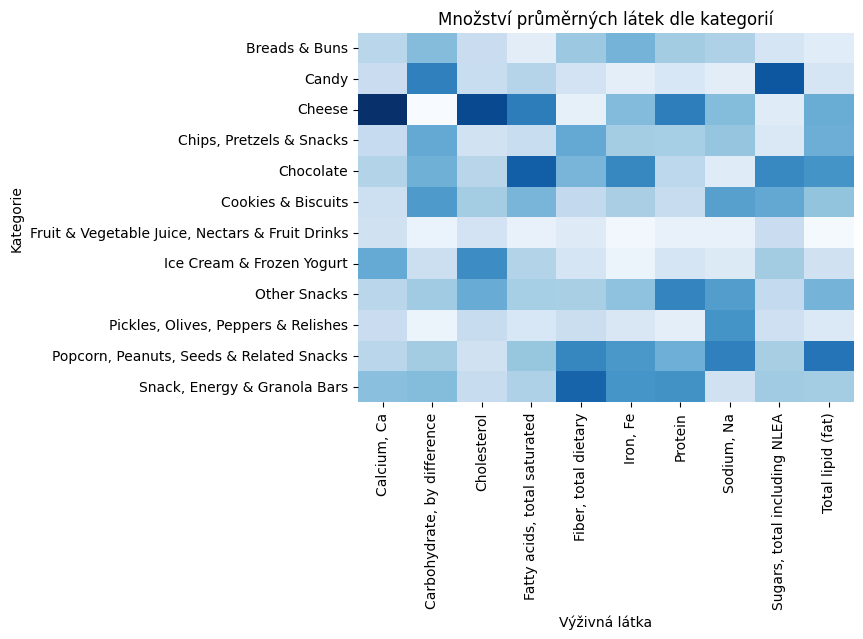

In [177]:
food_pivot = pd.crosstab(food_merged["branded_food_category"],
                         food_merged["name"], food_merged["amount"], aggfunc=np.mean)

# Standardizace je proces, při kterém se data transformují tak, aby měla nulový průměr a jednotkovou směrodatnou odchylku. 
# Výsledkem je, že data jsou na stejné škále, 
food_pivot_norm = (food_pivot - food_pivot.mean()) / food_pivot.std()

ax = sns.heatmap(food_pivot_norm, cmap="Blues", cbar=False)
ax.set(
    xlabel="Výživná látka",
    ylabel="Kategorie",
    title="Množství průměrných látek dle kategorií",
)

---
## Cvičení

### Booking

Stáhni si data ze souboru o rezervacích hotelů ze serveru Booking.com. Data jsou uložená v souboru [hotel_bookings.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/booking/hotel_bookings.csv). U rezervací evidujeme, jestli byly zrušené, to najdeme ve sloupci `is_canceled` (1 pro zrušené rezervace a 0 pro nezrušené). Vytvoř kontingenční tabulku, která porovná počet zrušených rezervací podle typu hotelu (sloupec `hotel`). Je více rezervací zrušeno pro městské hotely nebo pro hotely v rezortech?

Dále zkus rezervace rozdělit do skupin podle toho, v jakém předstihu byly rezervace provedeny. Zaměř se pouze na rezervace v městkých hotelech, tj. vytvoř tabulku, která bude obsahovat pouze data, které mají ve sloupci `hotel` hodnotu `City Hotel`- Využij sloupec `lead_time`. Níže máš skupiny, podle kterých můžeš data rozdělit. Vytvoř si pivot tabulku, která zobrazuje počty rezervací v jednotlivých kategoriích v závislosti na tom, jestli byly zrušeny nebo ne. Pro které kategorie je více zrušených rezervací a pro které naopak více nezrušených? A v jaké skupině je celkově nejvíce rezervací?

| Lead Time              | Reservation Category    |
|------------------------|-------------------------|
| 0-7                    | Last-minute             |
| 8-30                   | Short-term              |
| 31-180                 | Medium-term             |
| 180-inf                | Long-term               |


In [178]:
data = pd.read_csv(
    "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/booking/hotel_bookings.csv"
)

In [179]:
pd.crosstab(data["hotel"],
            data["is_canceled"],
            normalize="index"
            ).style.format("{:.0%}")

is_canceled,0,1
hotel,,
City Hotel,58%,42%
Resort Hotel,72%,28%


In [180]:
data = data[data["hotel"] == "City Hotel"]

bins = [0, 7, 30, 180, float("inf")]
labels = ["Last-minute", "Short-term", "Medium-term", "Long-term"]
data["lead_time_category"] = pd.cut(data["lead_time"], bins=bins, labels=labels)

data_pivot = pd.crosstab(data["lead_time_category"], data["is_canceled"])
data_pivot.rename(columns={0: "Canceled", 1: "Ok"}, inplace=True)
data_pivot

is_canceled,Canceled,Ok
lead_time_category,,
Last-minute,6653,1046
Short-term,8674,3880
Medium-term,21974,17046
Long-term,6091,10857


### Titanic a další pivot tabulky

K tomuto cvičení využij data o cestujících na Titanicu ze souboru [titanic.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/titanic/titanic.csv).

Vytvoř další kontingenční tabulku, která porovná závislost mezi třídou (sloupec `Pclass`), ve které cestoval, a tím, jestli přežil. Zkus spočítat počty přeživších z každé třídy. Dále zkus vypočítat relativní počet přeživších pro jednotlivé třídy. Dále zkus vytvořit tabulku s relativním počtem přeživších v závislosti na pohlaví (sloupec `Sex`).

In [181]:
data = pd.read_csv(
    "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/titanic/titanic.csv"
)
data_pivot = pd.crosstab(data["Pclass"], data["Survived"])
data_pivot

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [182]:
data_pivot = pd.crosstab(data["Pclass"], data["Survived"], normalize="index")
data_pivot.style.format("{:.2%}")

Survived,0,1
Pclass,,
1,37.04%,62.96%
2,52.72%,47.28%
3,75.76%,24.24%


In [183]:
data_pivot = pd.crosstab(data["Sex"], data["Survived"])
data_pivot

Survived,0,1
Sex,,
female,81,233
male,468,109


In [184]:
data_pivot = pd.crosstab(data["Sex"], data["Survived"], normalize="index")
data_pivot.style.format("{:.0%}")

Survived,0,1
Sex,,
female,26%,74%
male,81%,19%


---
## Bonusy

### Doprava

Stáhni si data ze souboru [traffic.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/doprava/traffic.csv), který zobrazuje počet aut v hodinových intervalech na čtyřech různých křižovatkách.

Pro následující dva úkoly využij funkci `cut`.

- Tabulka je poměrně velká, zkusme tedy rozdělit den na několik částí v závislosti na hodině měření (sloupec `Hour`):
  - noc (22 hodin až 5 hodin),
  - ranní špička (6 hodin až 9 hodin),
  - poledne (10 hodin až 13 hodin),
  - odpolední špička (14 hodin až 16 hodin),
  - večer (17 hodin až 21 hodin).
- Dny v týdnu (sloupec `DayOfWeek`) rozděl na pracovní dny a víkend. Nejprve je třeba se ujistit, které číslo znamená který den. Podívej se například první záznam. Tam je datum 2015-11-01, tj 11. listopad 2015. Ve sloupci `DayOfWeek` je hodnota 6. Podívej se do kalendáře, který den v týdnu to je. Od jakého čísla jsou dny v týdnu v tabulce počítané?


Nakonec pomocí pivot tabulky průměrné počty aut (sloupec `Vehicles`) v jednotlivých částech dne a typech dne.

Tipy:

- Všimni si, že noc je rozdělená na dvě části - od půlnoci do 5 hodin a od 22 hodin do půlnoci. Bohužel musí být seznam názvů skupin unikátní, můžeš ale například vytvořit skupiny `noc_1` a `noc_2`. Poté můžeš podřetězce `_1` a `_2` odstranit pomocí metody `.str.replace()`.

In [185]:
data = pd.read_csv(
    "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/doprava/traffic.csv"
)
data.head()

,DateTime,Junction,Vehicles,ID,DayOfWeek,Hour
0,2015-11-01 00:00:00,1,15,20151101001,6,0
1,2015-11-01 01:00:00,1,13,20151101011,6,1
2,2015-11-01 02:00:00,1,10,20151101021,6,2
3,2015-11-01 03:00:00,1,7,20151101031,6,3
4,2015-11-01 04:00:00,1,9,20151101041,6,4


In [186]:
bins = [0, 5, 9, 13, 16, 21, 24]
labels = ["noc_1", "ranní špička", "poledne", "odpolední špička", "večer", "noc_2"]
data["HourGroup"] = pd.cut(data["Hour"], bins=bins, labels=labels)

data["HourGroup"] = data["HourGroup"].str.replace("_1", "")
data["HourGroup"] = data["HourGroup"].str.replace("_2", "")

bins = [1, 5, 6]
labels = ["weekday", "weekend"]
data["DayOfWeekGroup"] = pd.cut(data["DayOfWeek"], bins=bins, labels=labels)

data.head(15)

,DateTime,Junction,Vehicles,ID,DayOfWeek,Hour,HourGroup,DayOfWeekGroup
0,2015-11-01 00:00:00,1,15,20151101001,6,0,NaN,weekend
1,2015-11-01 01:00:00,1,13,20151101011,6,1,noc,weekend
2,2015-11-01 02:00:00,1,10,20151101021,6,2,noc,weekend
3,2015-11-01 03:00:00,1,7,20151101031,6,3,noc,weekend
4,2015-11-01 04:00:00,1,9,20151101041,6,4,noc,weekend
5,2015-11-01 05:00:00,1,6,20151101051,6,5,noc,weekend
6,2015-11-01 06:00:00,1,9,20151101061,6,6,ranní špička,weekend
7,2015-11-01 07:00:00,1,8,20151101071,6,7,ranní špička,weekend
8,2015-11-01 08:00:00,1,11,20151101081,6,8,ranní špička,weekend
9,2015-11-01 09:00:00,1,12,20151101091,6,9,ranní špička,weekend


In [187]:
data_pivot = pd.pivot_table(
    data,
    values="Vehicles",
    index="HourGroup",
    columns="DayOfWeekGroup",
    aggfunc=np.mean,
    margins=True,
)
data_pivot

/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/158231252.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = pd.pivot_table(
/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/158231252.py:1: FutureWarning: The provided callable <function mean at 0x10a8c7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data_pivot = pd.pivot_table(
/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/158231252.py:1: FutureWarning: The provided callable <function mean at 0x10a8c7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  da

DayOfWeekGroup,weekday,weekend,All
HourGroup,,,
noc,37.565253,28.850575,35.818302
odpolední špička,53.774256,33.318008,49.673579
poledne,54.049712,34.545977,50.139977
ranní špička,32.414986,23.669540,30.661866
večer,55.102017,40.928736,52.260829
All,45.462975,32.148426,42.793929


### Půjčování kol

V souboru [london_merged.csv](https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/kola/london_merged.csv) najdeš informace o počtu vypůjčení jízdních kol v Londýně. Vytvoř kontingenční tabulku, zobrazí průměrný počet reze (sloupec `weather_code` se sloupcem udávající měsíc). Počet vypůjčených kol je ve sloupci `cnt`. V datech je dále sloupec `Hour`, který označuje hodinu, pro který počet máme. Použij kód z předchozí části a rozděl data do kategorií podle denní doby. Vytvoř pivot tabulku, která zobrazí průměrné počty vypůjčených kol v závislosti na typu počasí (sloupec `weather_code`) a denní době.

Definice jednotlivých kódů ze sloupce `weather_code` jsou:

- 1 = Jasno; includes minor atmospheric conditions like haze, fog, patches of fog, or fog in the vicinity.
- 2 = Částečně oblačno; indicating a sky that is partly cloudy with scattered or few clouds.
- 3 = Převážně oblačno; mostly covered with clouds, but not entirely overcast.
- 4 = Zataženo; indicating a fully overcast or cloudy sky.
- 7 = Déšť / Lehký déšť; covering light rain conditions, including light rain showers.
- 10 = Déšť s bouřkou; rain accompanied by a thunderstorm.
- 26 = Sněžení; general condition of snow falling.
- 94 = Mrznoucí mlha; indicating fog conditions where the water droplets in the fog freeze upon contact with surfaces.

Pokud ti zobrazení pomocí číselných kódů přijde nepřehledné, můžeš kódy nahradit popisy. K tomu lze využít metodu `map`. Pro metodu `map` je nutné mít tzv. slovník, tj. strukturu, která obsahuje data ve dvojicích. Hodnoty ve dvojici jsou odděleny dvojtečkou a celá dvojice je oddělená čárkou. V našem případě máme slovník `weather_code_to_czech`, kde máme číselný kód a popisek hodnoty pro každé počasí. Výsledek poté uložíme do sloupce `weather_description`. Vyzkoušej kód níže a podívej se, zda skutečně v tabulce přibyl sloupec `weather_description` a zda hodnoty odpovídají číselným kódům.

```py
weather_code_to_czech = {
    1: "Jasno",
    2: "Částečně oblačno",
    3: "Převážně oblačno",
    4: "Zataženo",
    7: "Déšť / Lehký déšť",
    10: "Déšť s bouřkou",
    26: "Sněžení",
    94: "Mrznoucí mlha"
}
data['weather_description'] = data['weather_code'].map(weather_code_to_czech)
```

In [188]:
data = pd.read_csv(
    "https://kodim.cz/cms/assets/czechitas/python-data-1/python-pro-data-1/pivot-tabulky/dalsi-funkce/kola/london_merged.csv"
)

data["timestamp"] = pd.to_datetime(data["timestamp"])
data["month"] = data["timestamp"].dt.month

weather_code_to_czech = {
    1: "Jasno",
    2: "Částečně oblačno",
    3: "Převážně oblačno",
    4: "Zataženo",
    7: "Déšť / Lehký déšť",
    10: "Déšť s bouřkou",
    26: "Sněžení",
    94: "Mrznoucí mlha",
}
data["weather_description"] = data["weather_code"].map(weather_code_to_czech)

bins = [-1, 5, 9, 13, 16, 21, 24]
labels = ["noc_1", "ranní špička", "poledne", "odpolední špička", "večer", "noc_2"]
data["HourGroup"] = pd.cut(data["Hour"], bins=bins, labels=labels)
data["HourGroup"] = data["HourGroup"].str.replace("_1", "")
data["HourGroup"] = data["HourGroup"].str.replace("_2", "")

pivot_table_weather_daypart_uploaded = pd.pivot_table(
    data,
    values="cnt",
    index="weather_description",
    columns="HourGroup",
    aggfunc=np.mean,
)
pivot_table_weather_daypart_uploaded

/var/folders/5d/znj935k14dz74z15tg6g8b380000gn/T/ipykernel_8495/3527012863.py:26: FutureWarning: The provided callable <function mean at 0x10a8c7740> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_weather_daypart_uploaded = pd.pivot_table(


HourGroup,noc,odpolední špička,poledne,ranní špička,večer
weather_description,,,,,
Déšť / Lehký déšť,162.098830,983.754386,782.436950,1076.380137,1190.138767
Déšť s bouřkou,NaN,636.600000,598.600000,357.500000,638.500000
Jasno,275.620342,2057.231304,1460.256272,1671.438797,1914.591063
Převážně oblačno,234.849882,1502.337255,1212.393173,1600.268734,1716.509524
Sněžení,73.615385,728.000000,NaN,678.785714,324.833333
Zataženo,228.461092,1562.532110,1275.919708,1005.351515,1157.671875
Částečně oblačno,245.026163,1671.632479,1422.230269,1956.228324,2066.358857
